In [5]:
path = "http://www.pilio.idv.tw/ltohk/listbbk.asp?indexpage=1&orderby=new"

pathLi =[]
for i in range(1, 75):
    path = "http://www.pilio.idv.tw/ltohk/listbbk.asp?indexpage={}&orderby=new".format(i)
    pathLi.append(path)

In [6]:
import requests
import os

for i in range(0, 74):
    re = requests.get(pathLi[i])
    re.encoding = 'big5'
    if not os.path.isdir("lottery"):
        os.makedirs("lottery")
    file = open("lottery/"+str(i),'w' ,encoding='utf8')
    file.write(re.text)
    file.close()

In [14]:
import os
pathLi = []

##for Graduated directory
fileli = os.listdir("lottery")
for name in fileli:
    pathLi.append("lottery/" + name)

In [7]:
import pandas as pd

def processAsDist(path):
    tables = pd.read_html(path,encoding='utf8')
    df_lottery = tables[1]
    df_lottery.drop([1,4],axis=1,inplace=True)
    df_lottery.drop(0,inplace=True)
    df_lottery.columns = ['期數','六合彩中獎號碼','特別號']

    def processSixNum(row):
        nums = pd.Series(row['六合彩中獎號碼'].replace(" ","").split(',')).astype(int)
        nums.sort_values()
        row['one'] = nums[0]
        row['two'] = nums[1]    
        row['three'] = nums[2]    
        row['four'] = nums[3]
        row['five'] = nums[4]    
        row['six'] = nums[5]    
        return row
    df_lottery = df_lottery.apply(processSixNum,axis=1)
    df_lottery.drop('六合彩中獎號碼', axis=1,inplace=True)

    def ToDIct(Row):
        def ToStr(item):
            if(pd.isnull(item)):
                return None
            else:
                return str(item)
        return Row.apply(ToStr).to_dict()

    df_lottery = df_lottery.apply(ToDIct, axis=1).tolist()
    return df_lottery

In [16]:
lotteryObjs = []
for path in pathLi:
    lotteryObjs.extend(processAsDist(path))
print(len(lotteryObjs))

2220


In [19]:
columns = ['期數','one','two','three','four','five','six','特別號']
df_lottery = pd.DataFrame(lotteryObjs)[columns]
df_lottery

,期數,one,two,three,four,five,six,特別號
0,2236,10,25,26,32,36,37,46
1,2235,11,15,25,30,37,43,17
2,2234,3,4,31,37,42,44,40
3,2233,8,9,15,33,37,47,01
4,2232,4,6,27,36,47,49,03
5,2231,5,9,12,25,26,34,21
6,2230,6,14,32,33,40,46,10
7,2229,29,34,35,42,43,48,26
8,2228,4,5,25,27,29,41,18
9,2227,1,11,20,22,43,45,35


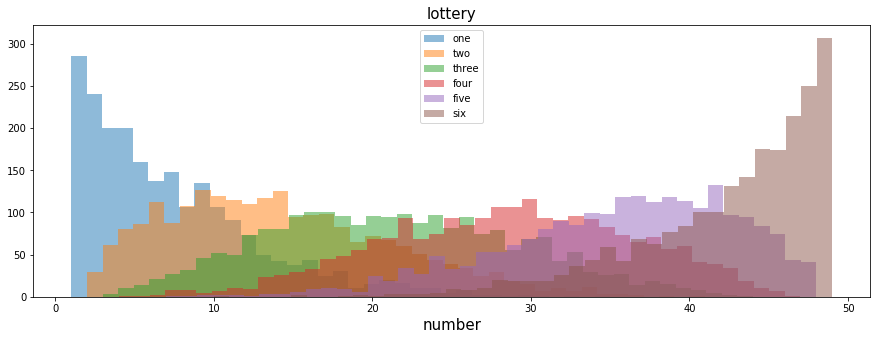

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
Li = df_lottery['one'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='one')
Li = df_lottery['two'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='two')
Li = df_lottery['three'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='three')
Li = df_lottery['four'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='four')
Li = df_lottery['five'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='five')
Li = df_lottery['six'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='six')

plt.axis = range(1,50)

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

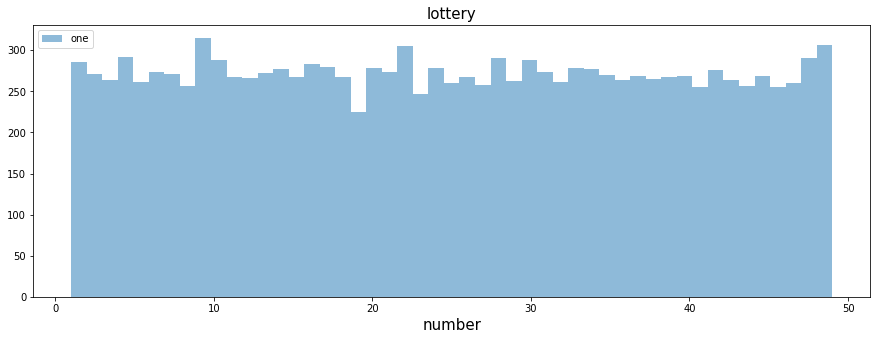

In [21]:
df_lottery_total = list(df_lottery['one'])+list(df_lottery['two'])+list(df_lottery['three'])+list(df_lottery['four'])+list(df_lottery['five'])+list(df_lottery['six'])
df_lottery_total = pd.Series(df_lottery_total).astype(int)

plt.figure(figsize=(15, 5))
plt.hist(df_lottery_total ,bins=49 , alpha=0.5,label='one')

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

In [49]:
from pymongo import MongoClient
conn = MongoClient('localhost', 27017)
db = conn.SuperUniversityCourses
collection = db['lottery']

for path in pathLi:
    collection.insert_many(processAsDist(path))

In [50]:
cursor = collection.find()
lotteries = [i for i in cursor]

In [55]:
df_lottery = pd.DataFrame(lotteries)
# df_lottery
columns = ['期數','one','two','three','four','five','six','特別號']
df_lottery = df_lottery[columns]

In [57]:
df_lottery.to_csv('lotteryNums.csv')

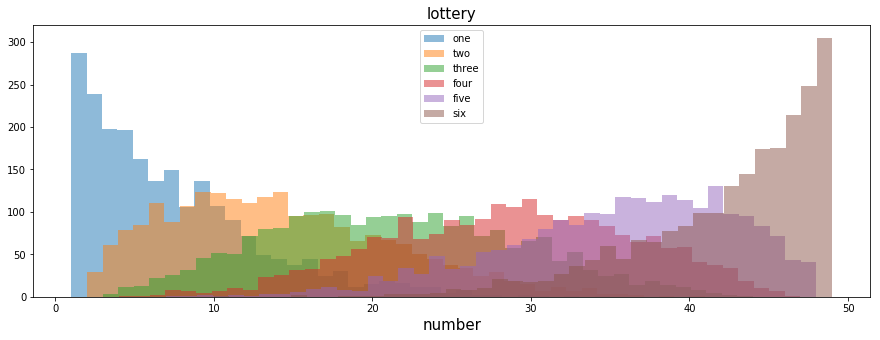

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
Li = df_lottery['one'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='one')
Li = df_lottery['two'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='two')
Li = df_lottery['three'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='three')
Li = df_lottery['four'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='four')
Li = df_lottery['five'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='five')
Li = df_lottery['six'].astype(int)
plt.hist(Li,bins=max(Li) - min(Li)+1, alpha=0.5,label='six')

plt.axis = range(1,50)

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

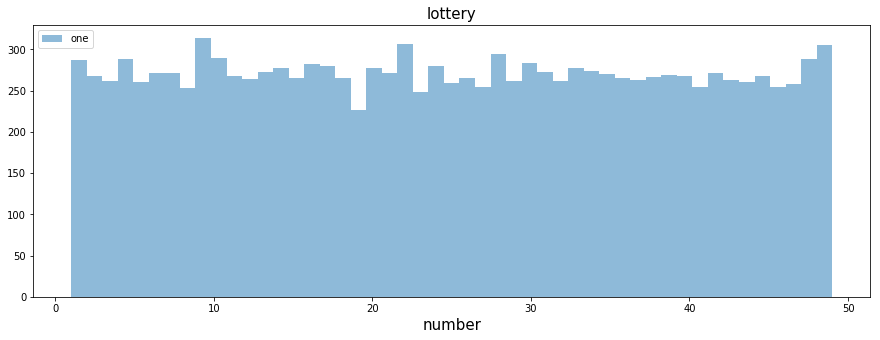

In [82]:
df_lottery_total = list(df_lottery['one'])+list(df_lottery['two'])+list(df_lottery['three'])+list(df_lottery['four'])+list(df_lottery['five'])+list(df_lottery['six'])
df_lottery_total = pd.Series(df_lottery_total).astype(int)

plt.figure(figsize=(15, 5))
plt.hist(df_lottery_total ,bins=49 , alpha=0.5,label='one')

plt.legend()
plt.title('lottery', fontsize=15)
plt.xlabel('number', fontsize=15)
plt.show()

In [94]:
from collections import Counter
count = pd.Series(Counter(list(df_lottery_total)))

count.sort_values()
